In [ ]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.01123988 0.01207819 0.01155182 0.02688619 0.
 0.01019029 0.         0.         0.        ]


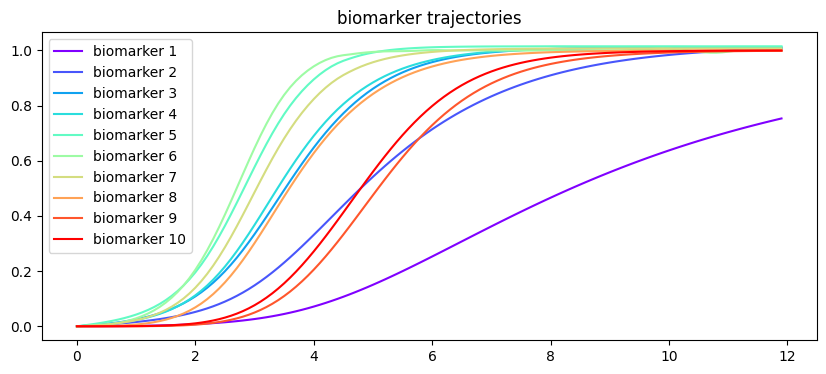

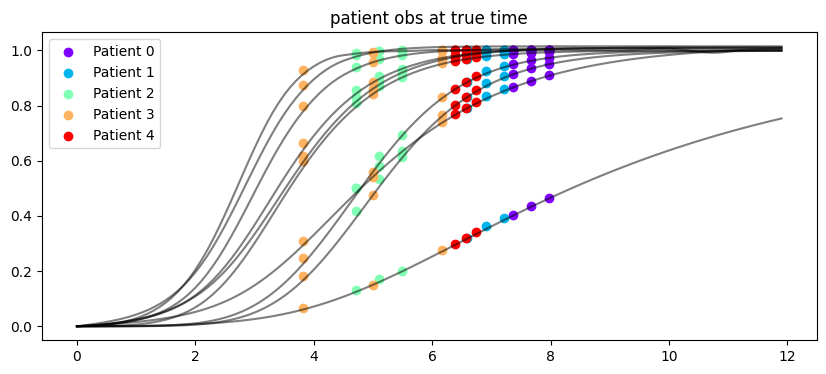

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [01:44<00:09,  9.46s/it]


SUMMARY:
best LSE at iteration 10: 362.4364306266422
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.13937971 0.2
 0.2        0.2        0.2        0.2        0.2        0.2
 0.00553103 0.03460988 0.44600923 0.78757274 0.91113034 0.91854192
 0.95360474 0.95341199 0.93901919 0.89559905 0.77998302 0.80980545
 4.18979332]
final theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.17633177
 0.01237505 0.03482848 0.4858109  0.80590741 0.91297166

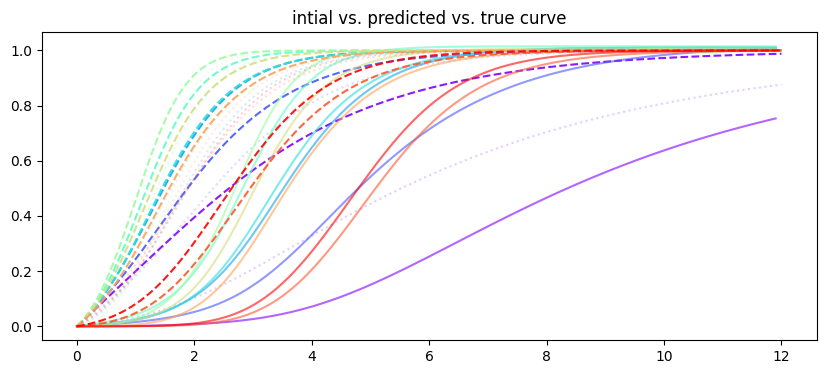

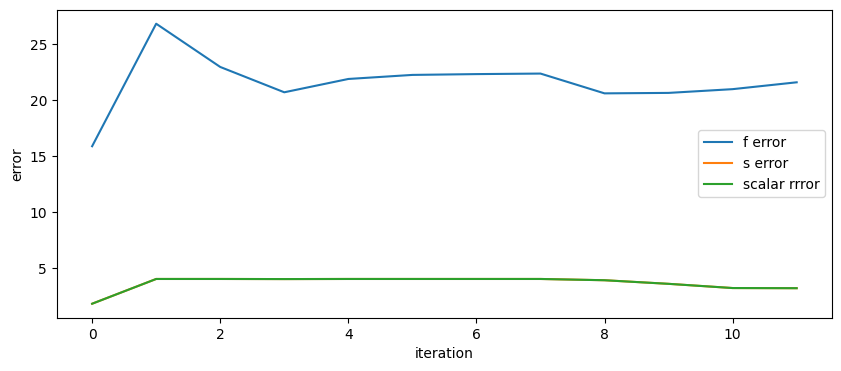

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


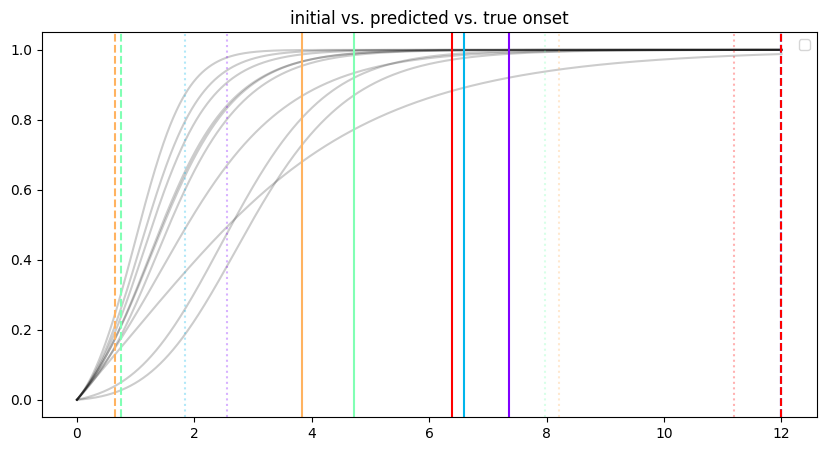

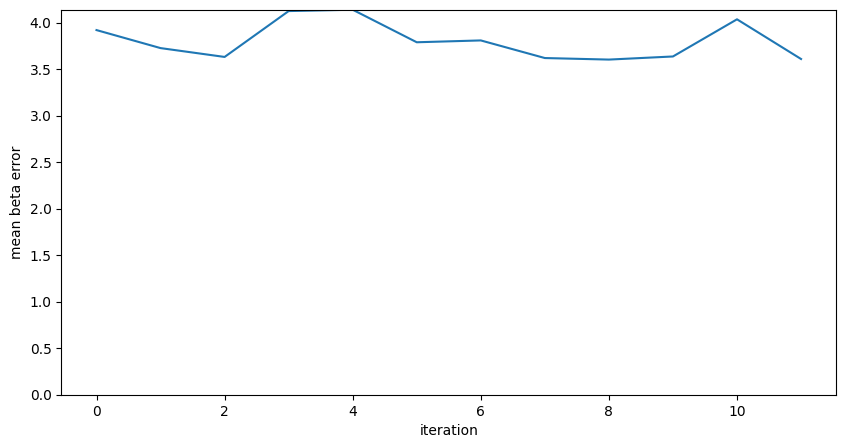

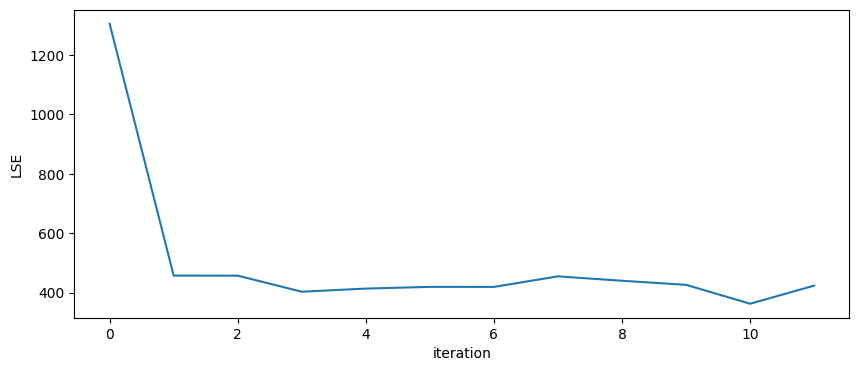

In [3]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f, scalar_K  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=0.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [01:54<00:10, 10.45s/it]


SUMMARY:
best LSE at iteration 9: 27.15364643674011
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00840679 0.03751548
 0.06944125 0.07090627 0.1356752  0.10420377 0.08233127 0.03866671
 0.00663064 0.0093047  0.90388837 0.99115173 1.00380681 1.0042498
 1.00319747 0.99831769 1.00297715 0.99872461 0.98787002 0.99213753
 0.91054001]
final theta:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00736188
 0.04835088 0.04751686 0.09455089 0.07790723 0.05906028 0.02437341
 0.00257478 0.00575063 1.62170812 1.

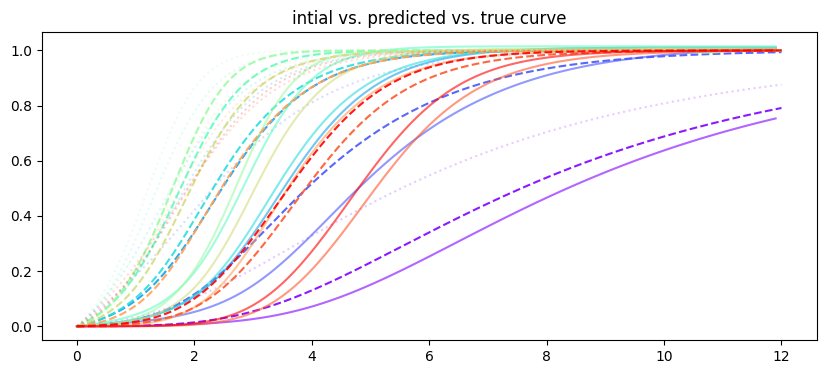

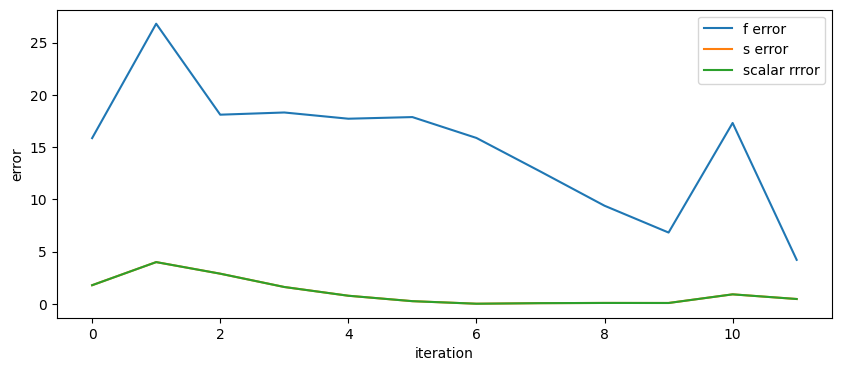

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


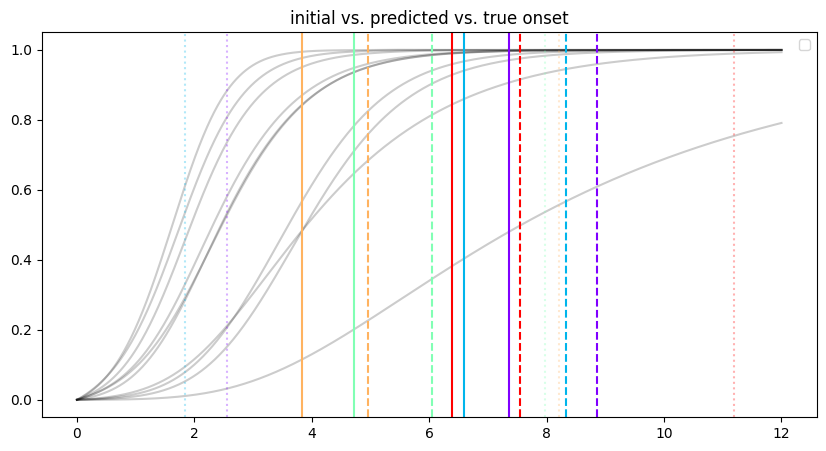

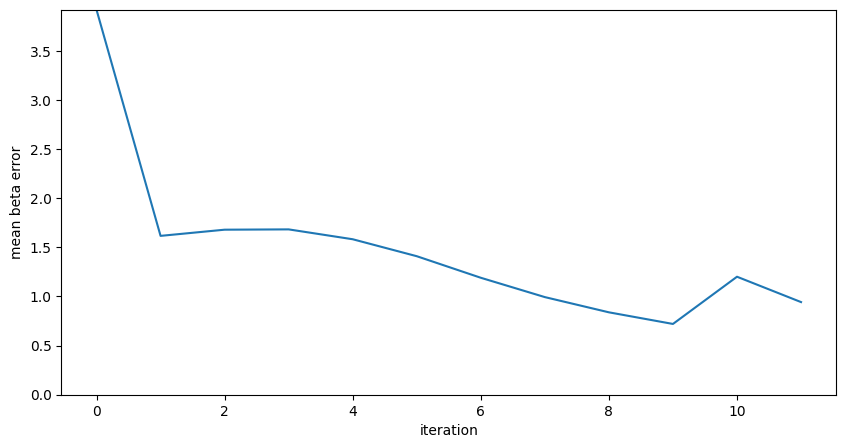

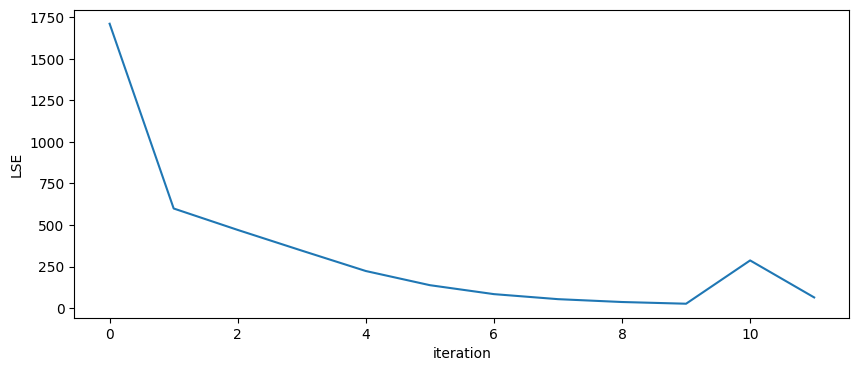

In [4]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=0.01,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


#cog = 0.01

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [04:24<00:24, 24.03s/it]


SUMMARY:
best LSE at iteration 10: 19.380347910218706
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35576095e-03 1.13846803e-02
 1.47348069e-02 1.31462824e-02 2.98445749e-02 1.25988557e-03
 1.16931480e-02 4.42556030e-04 2.25899875e-04 3.85626204e-05
 9.99838528e-01 1.01706454e+00 1.00571231e+00 1.00548317e+00
 1.00420743e+00 9.98436978e-01 1.00258655e+00 9.98397809e-01
 9.97698379e-01 9.97558363e-01 9.77878815e-01]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 

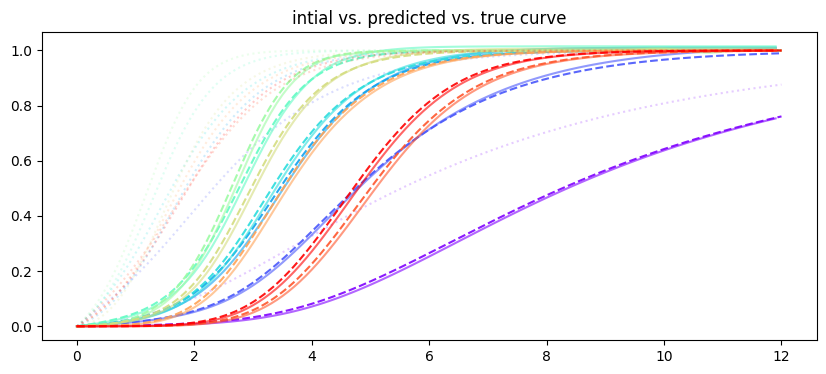

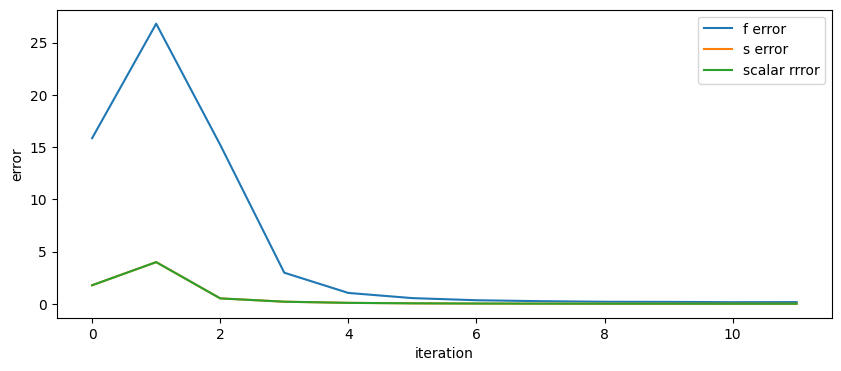

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


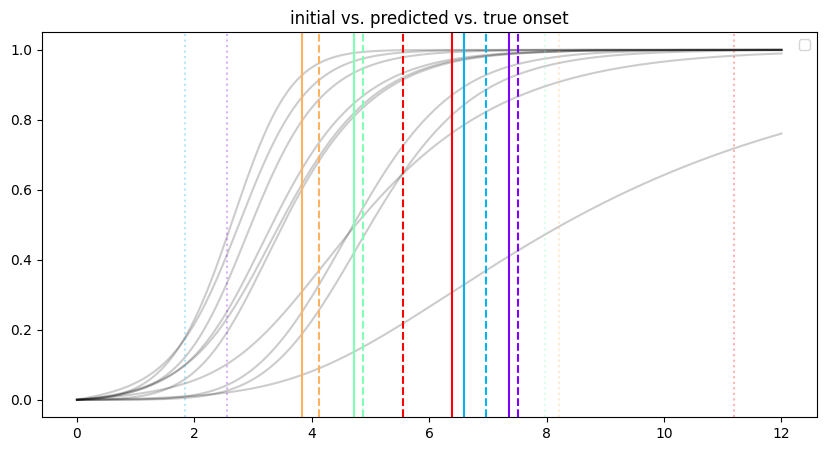

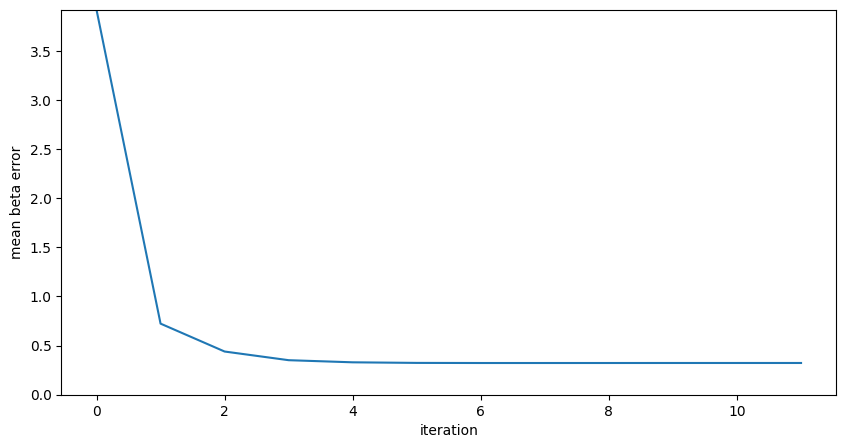

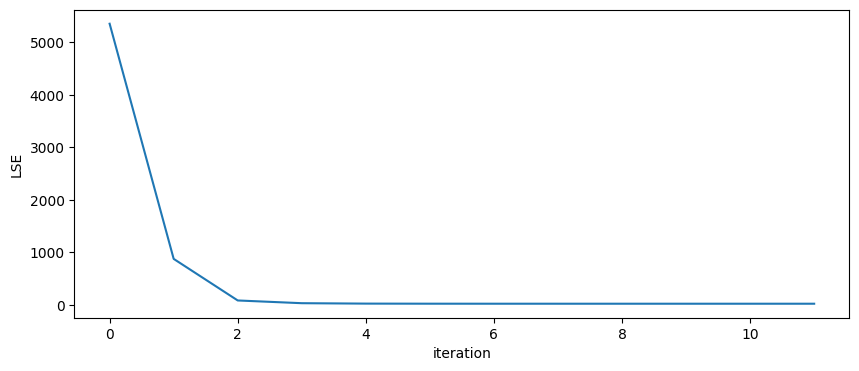

In [5]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=0.1,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## alpha = 0.1

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [04:01<00:21, 21.94s/it]


SUMMARY:
best LSE at iteration 8: 41.608082498004016
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.70745328e-03 1.37135544e-02
 1.98329287e-02 1.76276165e-02 3.38951663e-02 1.39449094e-03
 1.63999212e-02 5.28879824e-03 8.23215816e-04 7.91567087e-04
 1.02951172e+00 1.02458852e+00 1.00615873e+00 1.00644974e+00
 1.00276891e+00 9.96950030e-01 1.00252444e+00 9.99843347e-01
 1.00142308e+00 9.99167550e-01 9.24852521e-01]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0

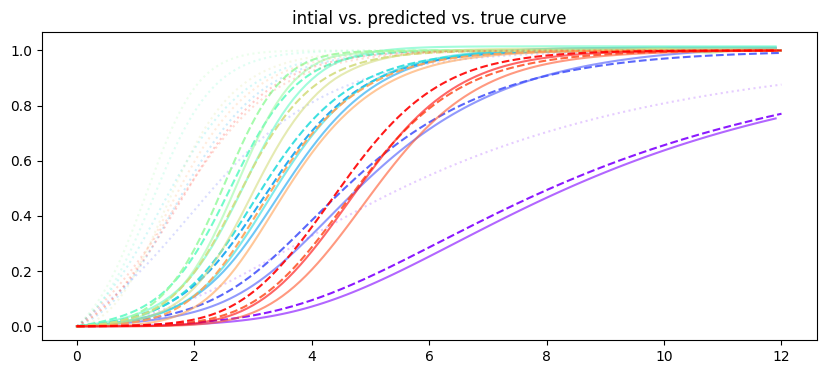

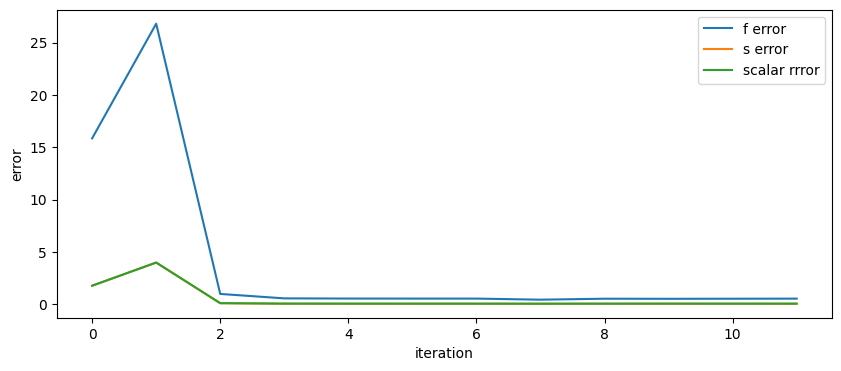

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


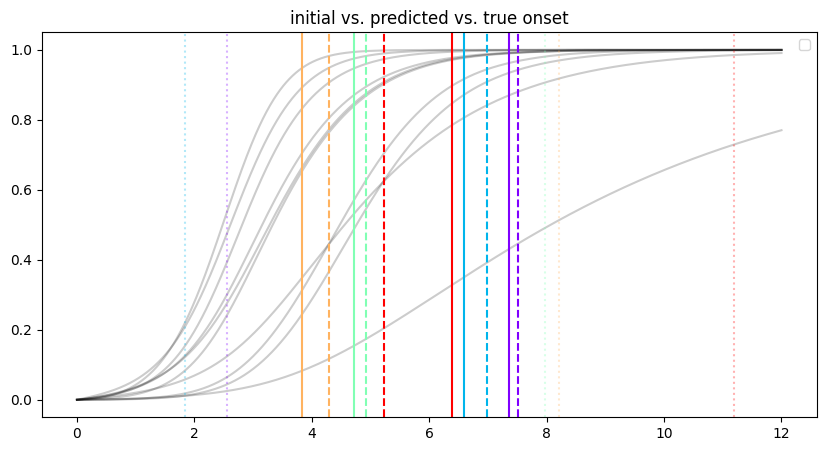

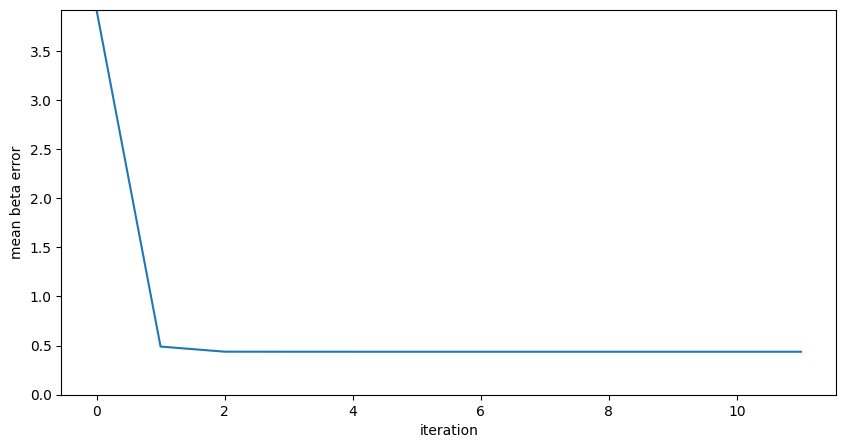

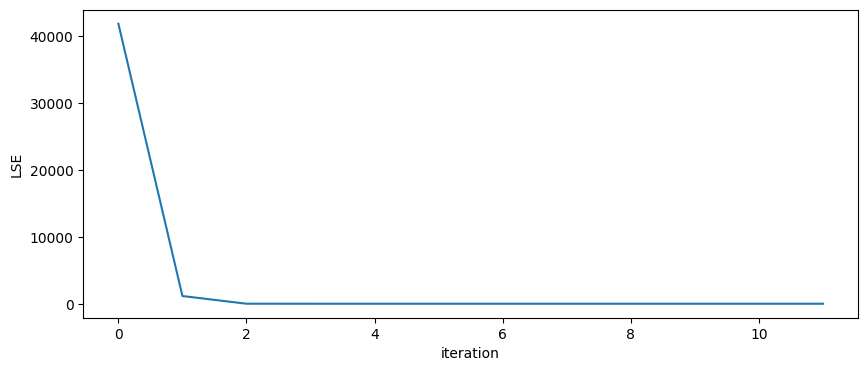

In [6]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=1.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)


## alpha = 1.0

initial conditions:
initial f: [0.01490907 0.16291554 0.08029182 0.184533   0.15572293 0.19792942
 0.02388094 0.10736655 0.1746095  0.11053824]
initial s: [1.25802863 0.88057217 1.69412896 2.02240196 1.29799371 2.24293252
 0.44400018 2.17350915 0.34762954 1.64389975]
initial scalar: 2.789092063970113
initial beta estimates (first 5 patients):    patient_id         0
0           0  2.559500
1           0  2.559500
2           0  2.559500
3           1  1.837549
4           1  1.837549
initial beta mean: 6.2177


 92%|█████████▏| 11/12 [03:53<00:21, 21.26s/it]


SUMMARY:
best LSE at iteration 5: 132.57747859095917
initial theta
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01490907 0.16291554
 0.08029182 0.184533   0.15572293 0.19792942 0.02388094 0.10736655
 0.1746095  0.11053824 1.25802863 0.88057217 1.69412896 2.02240196
 1.29799371 2.24293252 0.44400018 2.17350915 0.34762954 1.64389975
 2.78909206]
best theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.66109518e-03 1.49355814e-02
 2.06407631e-02 2.04167734e-02 3.58066510e-02 1.17544895e-05
 1.93655934e-02 7.36020582e-03 8.68745127e-04 1.26875735e-03
 1.04471568e+00 1.02809988e+00 1.00760637e+00 1.00676888e+00
 1.00278188e+00 9.96190610e-01 1.00251236e+00 1.00045864e+00
 1.00293617e+00 1.00088772e+00 9.06579346e-01]
final theta:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0

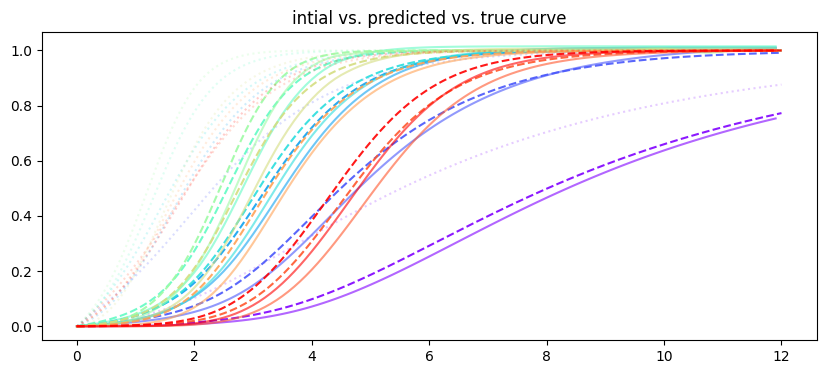

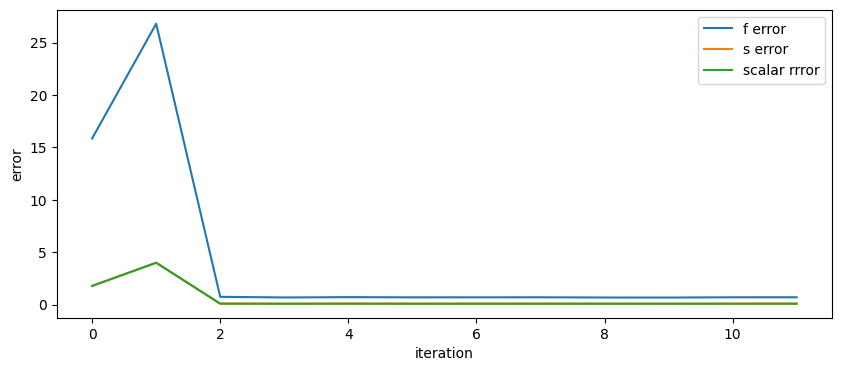

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


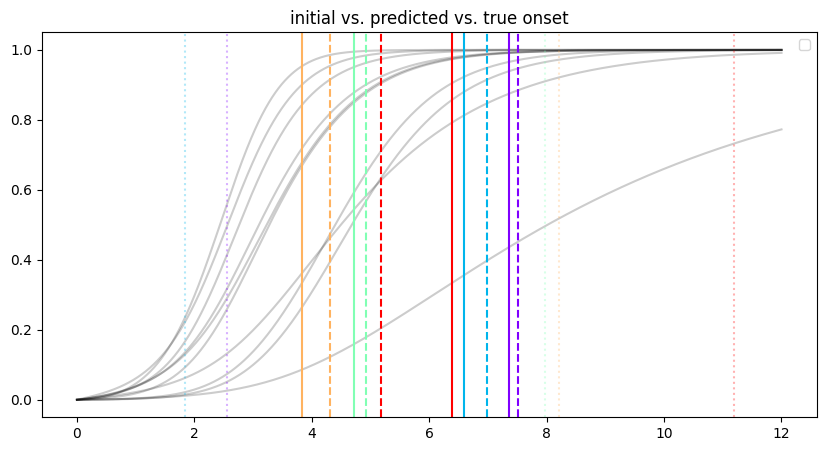

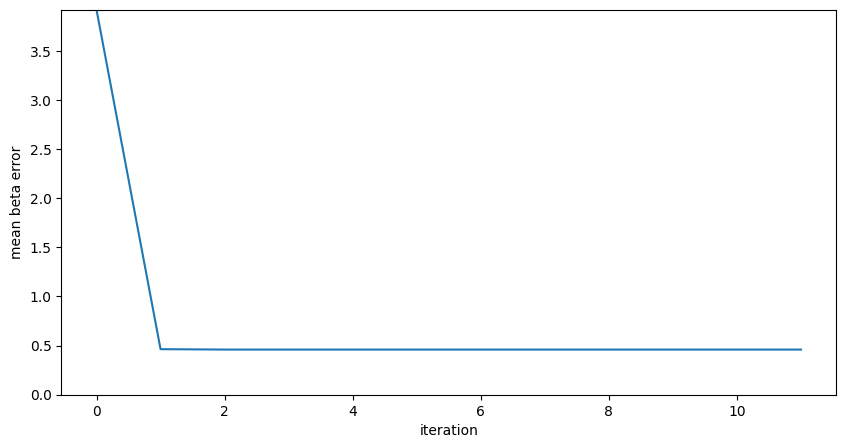

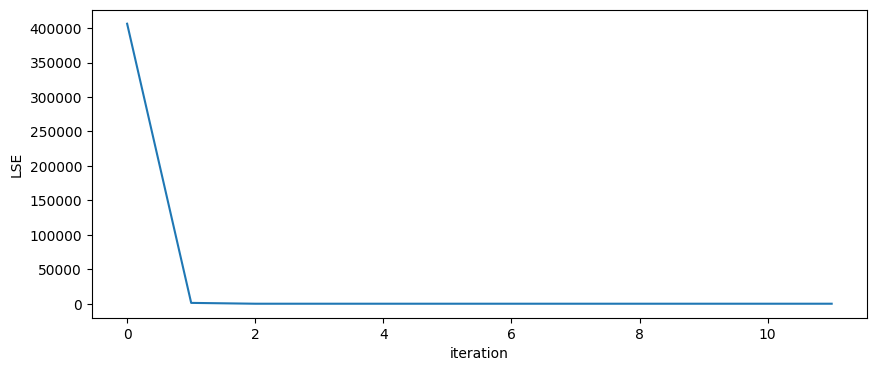

In [7]:
em_model_0 = EM(K=K,
              num_iterations=12,
              t_max=t_max,
              step=0.01,
              use_jacobian=False,
              lambda_cog=10.0,
              )

em_model_0.fit(df)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)
